### PID Ball Balancer 1-D (Hanan Basheer - 20B030018)

Approach: 
- Firstly intialized the constants and an integral variable
- Then generated the error in the X = [*position*, *accelaration*] array for every time instance
- Using this error PID equation was applied on X and total error in X array was summed up to minimize the error in both terms
- While constantly maintaining the cache of position, acceleration and theta, the ODEINT function was used to generate the new X using the equation: <br><br>
$X' = A.X + B.theta$ <br><br>
- Plotted the graphs

In [175]:
# Importing Libraries
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from ipywidgets import interact

In [176]:
# Defining Cache storage and g
g = 9.8
log1, log2, log3 = [], [], []

def deriv(X, t, theta):
    dX = np.matmul(np.array([[0, 1], [0, 0]]), X) + np.array([0, (-5 * g / 7)])*np.radians(theta)
    return dX

In [177]:
# saturation function
def cutoff(val, limit=float('inf')):
    return min(limit, max(-limit, val))

In [178]:
# Achieving setpoints
Xsp = np.array([0, 0])  # [position, accelaration]

# set initial conditions
theta = 0

# do simulation at fixed time steps dt
dt = 0.1
ti = 0.0
tf = 10.0

# control parameters
g = 9.8
kp = 20
ki = 80
kd = 4

I_initial = 0  # Integral sum

X0 = np.array([0.1, -0.2])  # Initial state of [postion, acceleration]
X_initial = X0
e_prev = Xsp - X_initial

# starting simulation

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    e = Xsp - X_initial
    I_initial += dt*(e)
    theta -= cutoff(sum(kp*(e) + ki*I_initial + kd*(e - e_prev)/dt), 1)
    theta = cutoff(theta, 15)
    
    # log data and update state
    log1.append(t)
    log2.append(theta)
    log3.append(X_initial)
    X_prev = X_initial
    X_initial = odeint(deriv,X0,[t,t+dt], args=(theta,))[-1]
    X_initial[0] = cutoff(X_initial[0], 300)

    # save data for PID calculations
    e_prev = e


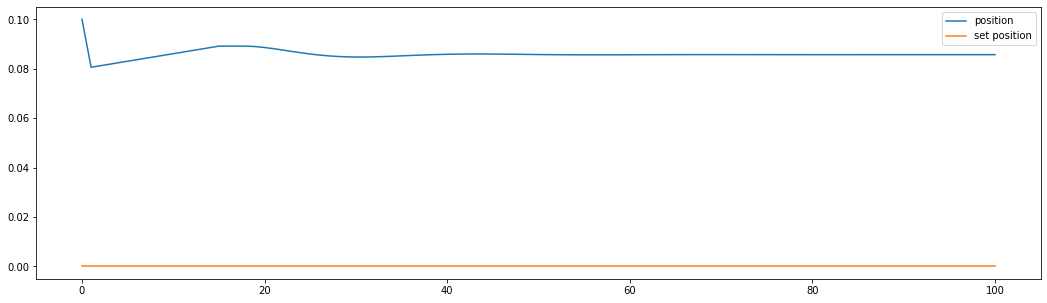

In [179]:
# plotting position
plt.figure(figsize=(18, 5))
plt.plot(np.array(log3)[:, 0], label="position")
plt.plot([Xsp[0] for i in range(len(log1))], label="set position")
plt.legend()

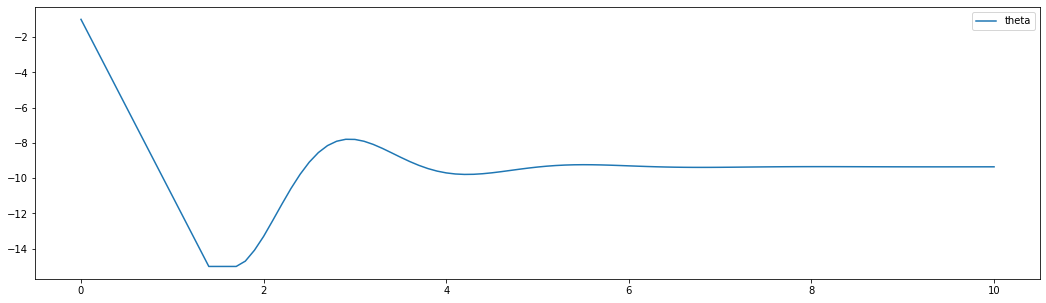

In [180]:
# plotting theta
plt.figure(figsize=(18, 5))
plt.plot(log1, log2, label="theta")
plt.legend()

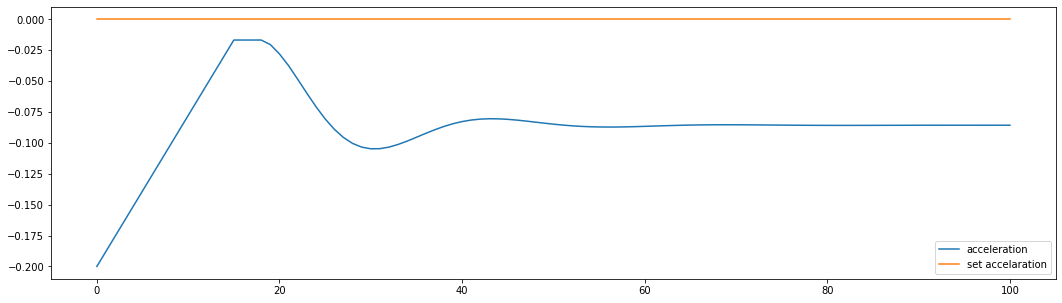

In [181]:
# plotting acceleration
plt.figure(figsize=(18, 5))
plt.plot(np.array(log3)[:, 1], label="acceleration")
plt.plot([Xsp[1] for i in range(len(log1))], label="set accelaration")
plt.legend()